In [6]:
from flask import Flask,render_template,url_for,request
import os
from plotly.offline import iplot
import plotly.graph_objs as go
from flask import Markup
import flask
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import plotly.io as pio
import plotly

In [2]:
movie = pd.read_csv('data/movie.csv')
data_movie = movie['Combined']
with open('model.pkl','rb') as fid:
    model = pickle.load(fid)
with open('model_recommend.pkl','rb') as fid:
    vec = pickle.load(fid)

data_movie = movie['Combined']
message = 'hello'

data = vec.transform([message])

result = model.kneighbors(data)
info = []
labels = []
idx = []
scores = []
for i in result[1][0]:
    t = movie.iloc[i]['Title']
    if(pd.isna(t)):
        continue
    else:
        j = np.argwhere(result[1][0] == i)[0][0]
        if(result[0][0][j] != 1):
            l = [t,data_movie.iloc[i]]
            scores.append(movie['scores'].iloc[i])
            info.append([movie['scores'].iloc[i],movie['Genre'].iloc[i],l,movie['url'].iloc[i]])
            idx.append(j)
            labels.append(t)
values = (result[0][0])[idx] 
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1','#A9D9B1']
trace = go.Pie(labels=labels, values=values,
       hoverinfo='label+percent', textinfo='value', 
       textfont=dict(size=20),
       marker=dict(colors=colors, 
                   line=dict(color='#000000', width=2)))

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



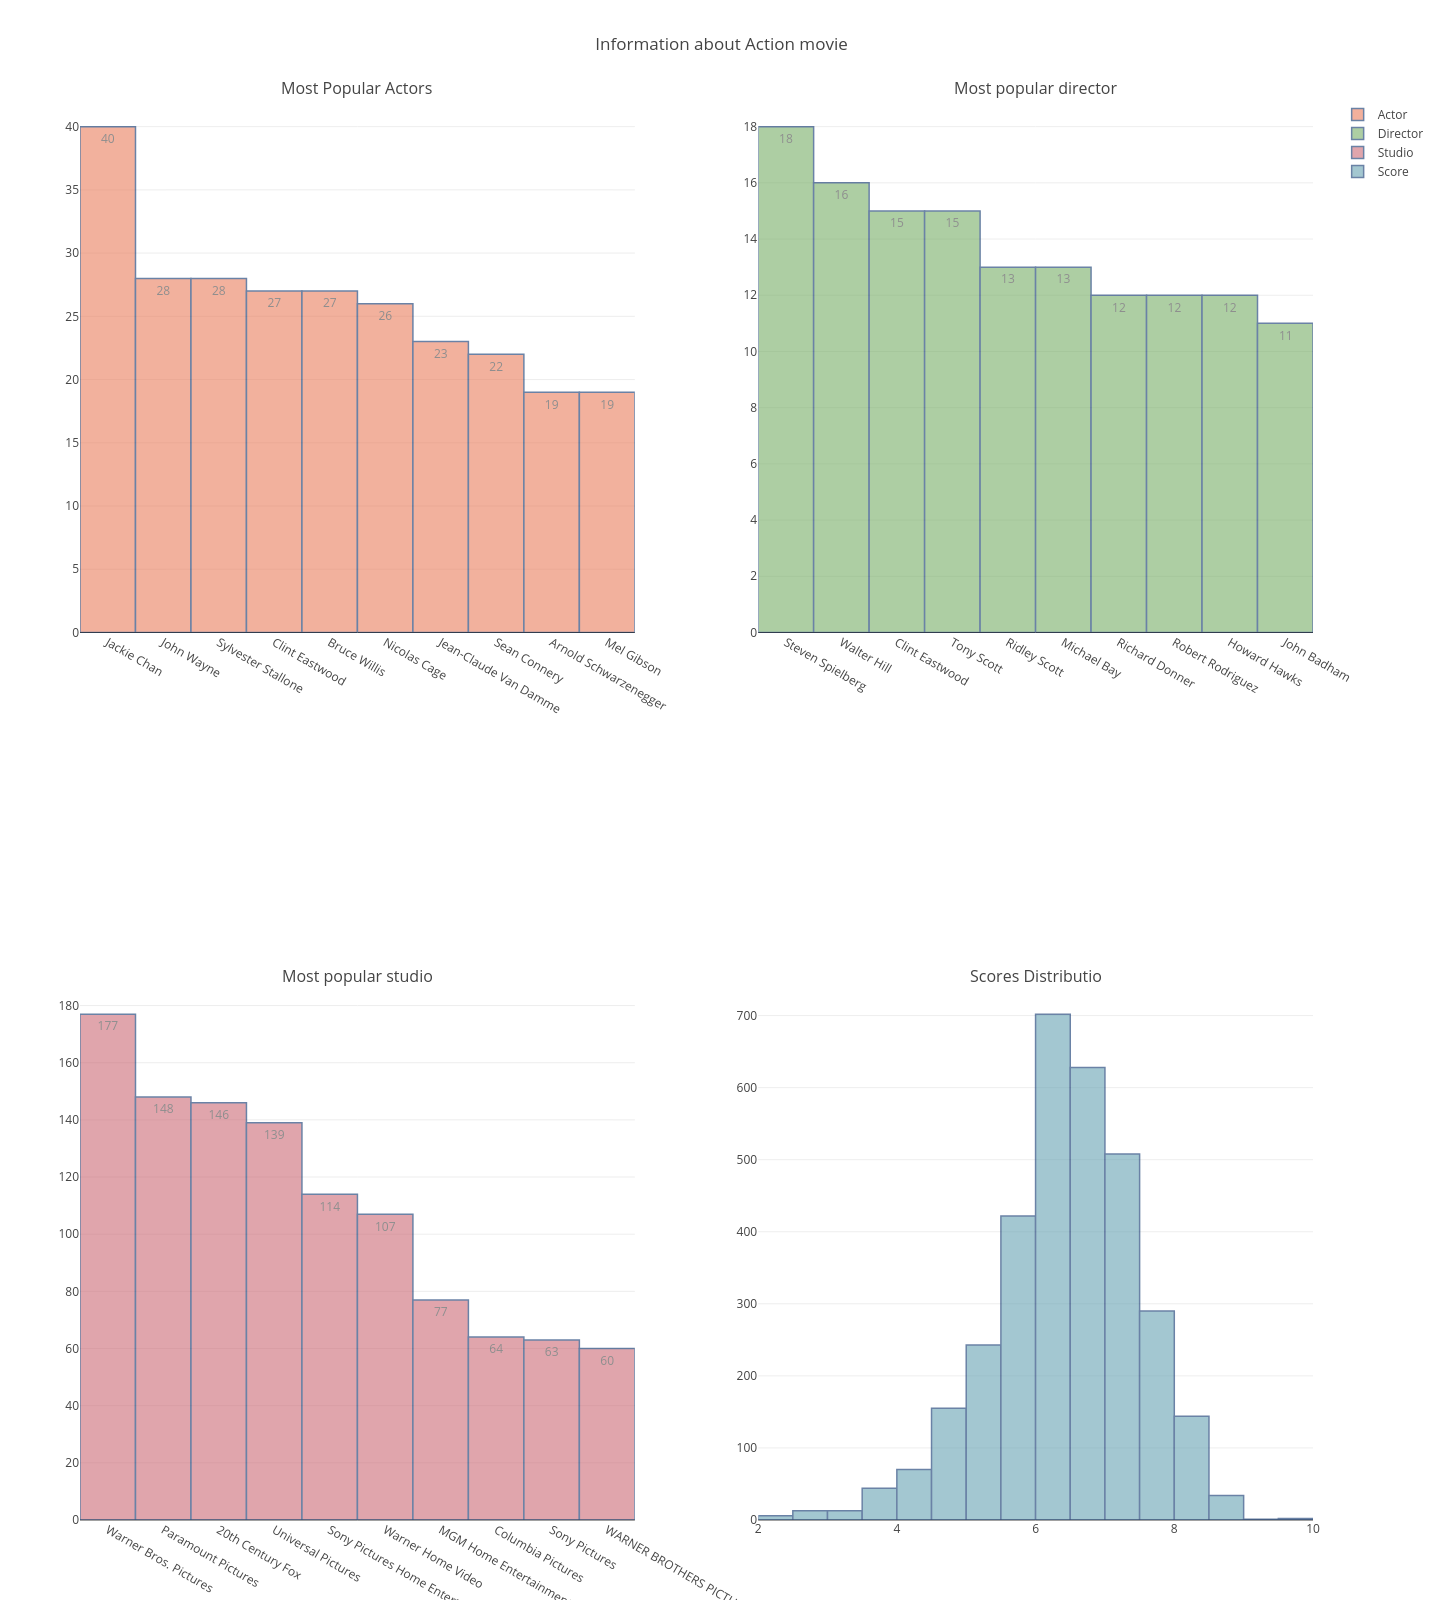

In [8]:
plotly.io.orca.config.executable = '/home/guangya/anaconda3/bin/orca'
plotly.io.orca.config.save() 
import matplotlib.pyplot as plt
from plotly import tools
df_action = movie[movie['Genre'].str.contains('Action') ]
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Action movie')
iplot(fig)
pio.write_image(fig, 'images/action.png')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



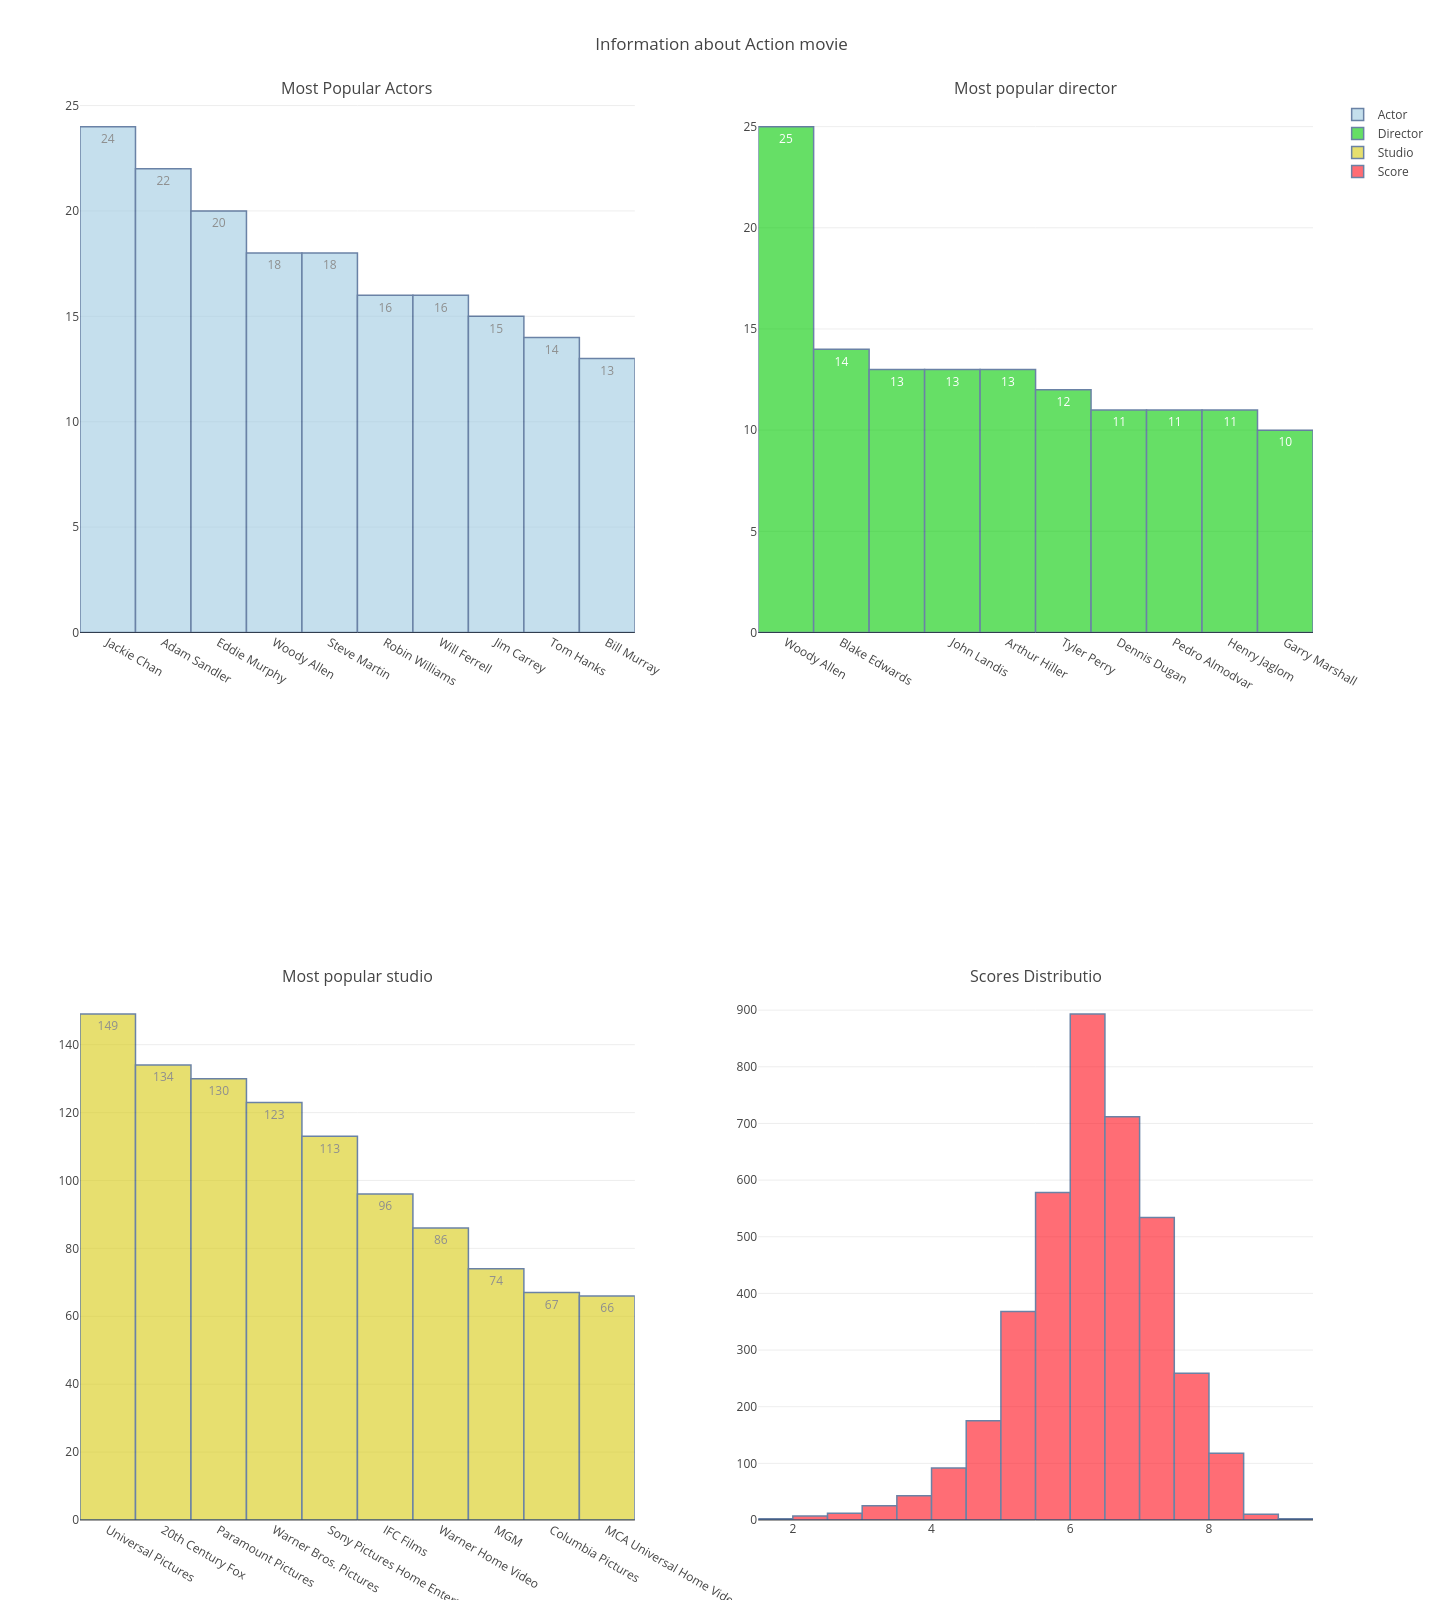

<Figure size 2160x1440 with 0 Axes>

In [93]:
df_comedy = movie[movie['Genre'].str.contains('Comedy') ]
df_action =df_comedy
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Action movie')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



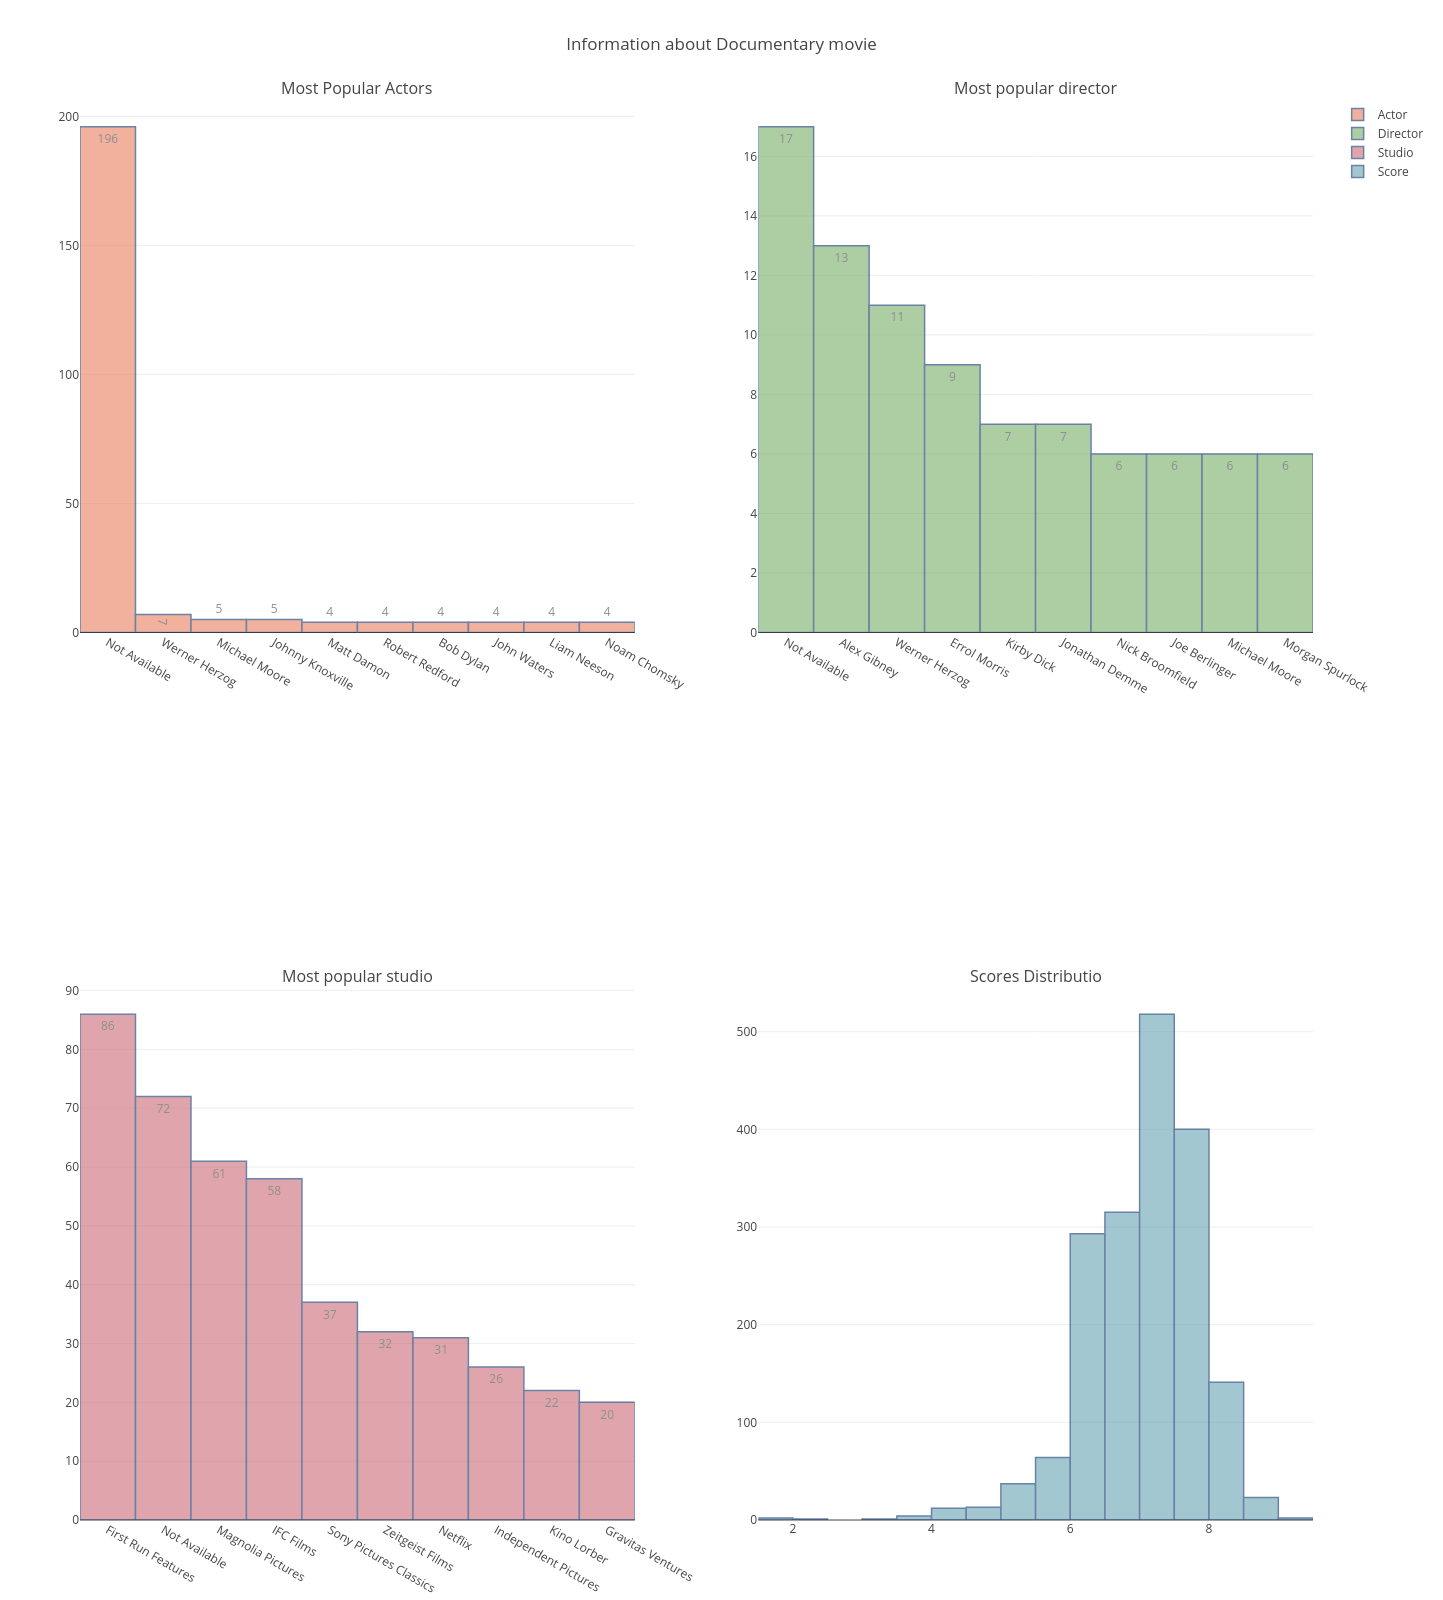

<Figure size 2160x1440 with 0 Axes>

In [120]:
df_docu = movie[movie['Genre'].str.contains('Documentary')]
plt.figure(figsize=(30,20))
df_action = df_docu
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[1])
info.append(df_action['Director 1'].value_counts().index[1])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Documentary movie')
iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



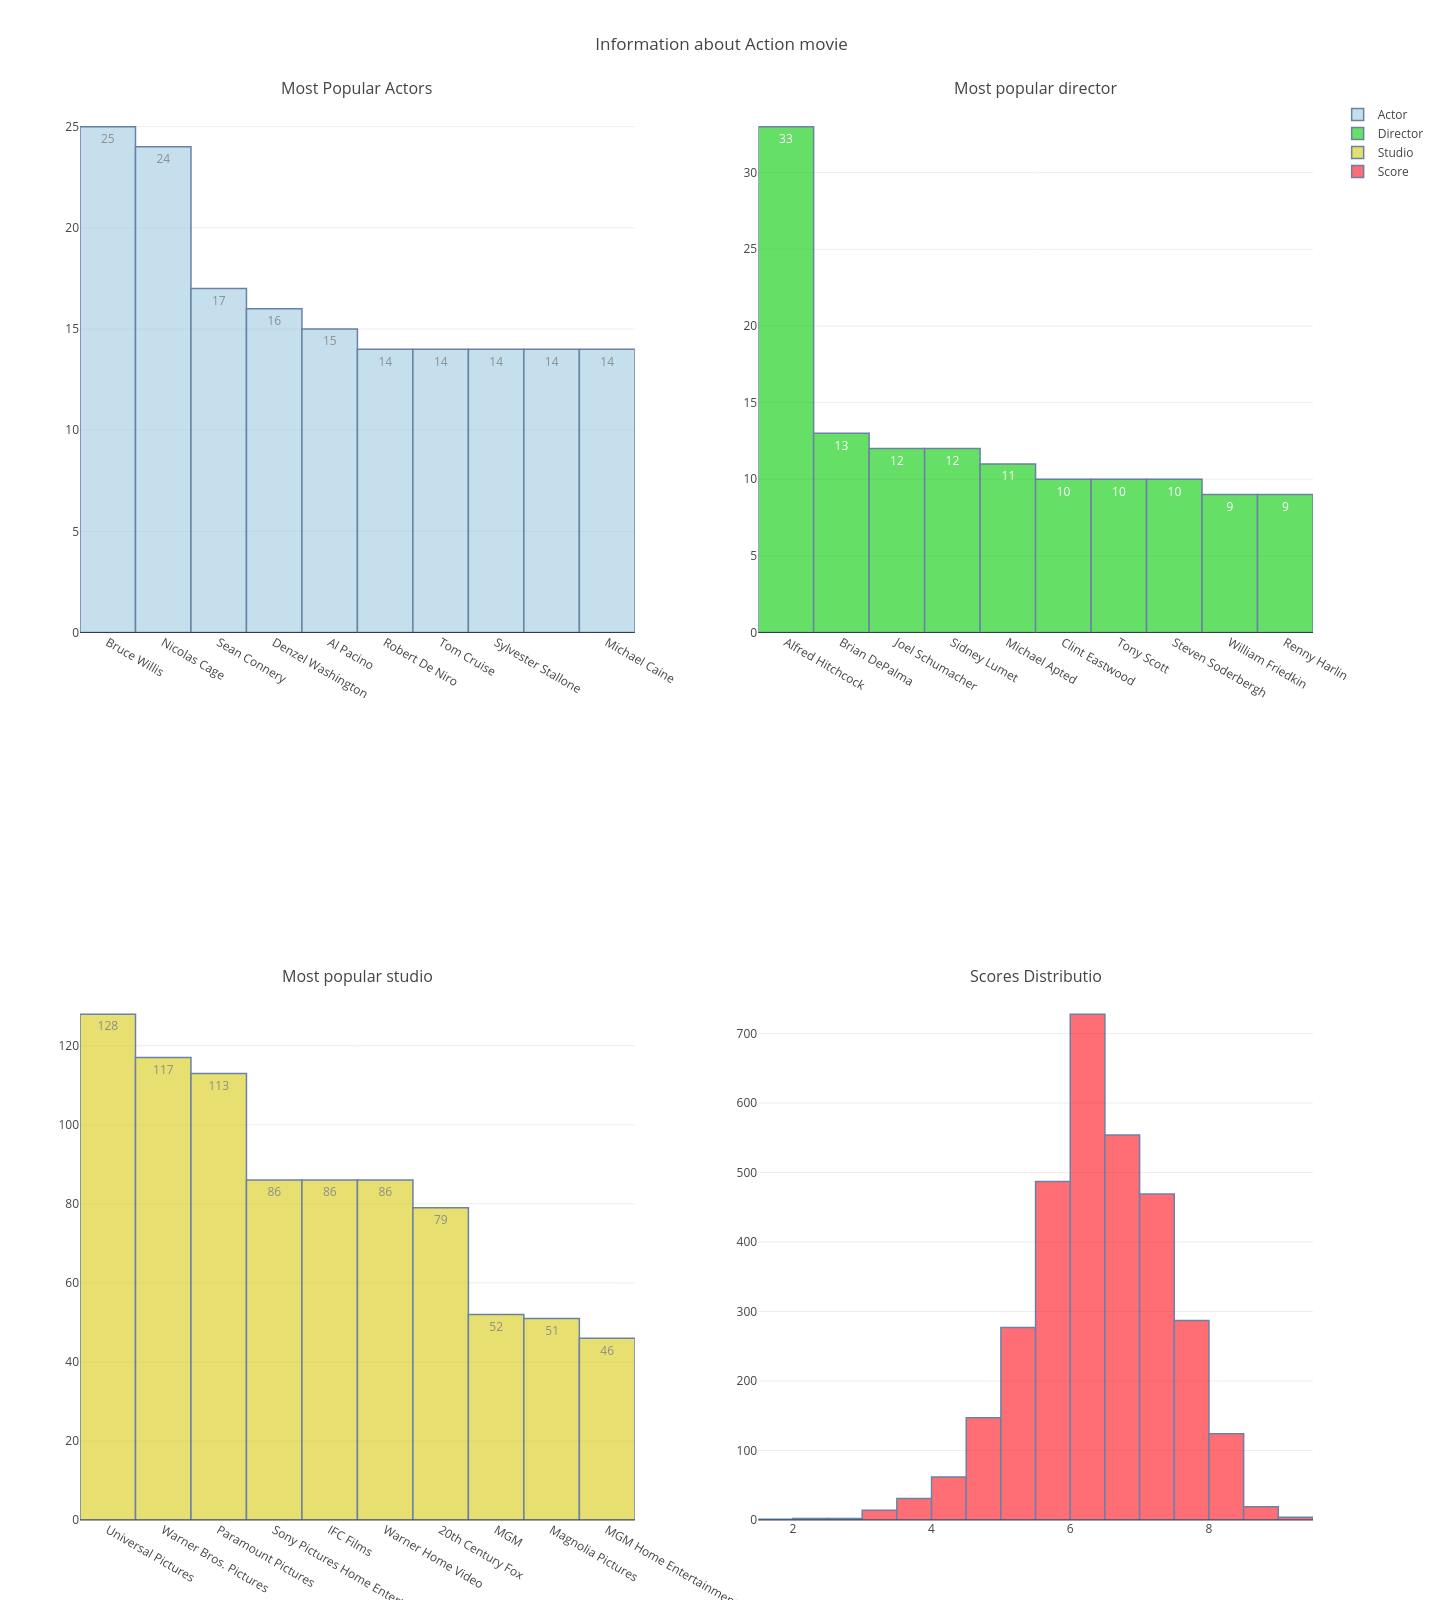

<Figure size 2160x1440 with 0 Axes>

In [111]:
df_mystery = movie[movie['Genre'].str.contains('Mystery') ]
plt.figure(figsize=(30,20))
df_action =df_mystery
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Mystery/Thriller movie')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



/home/guangya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



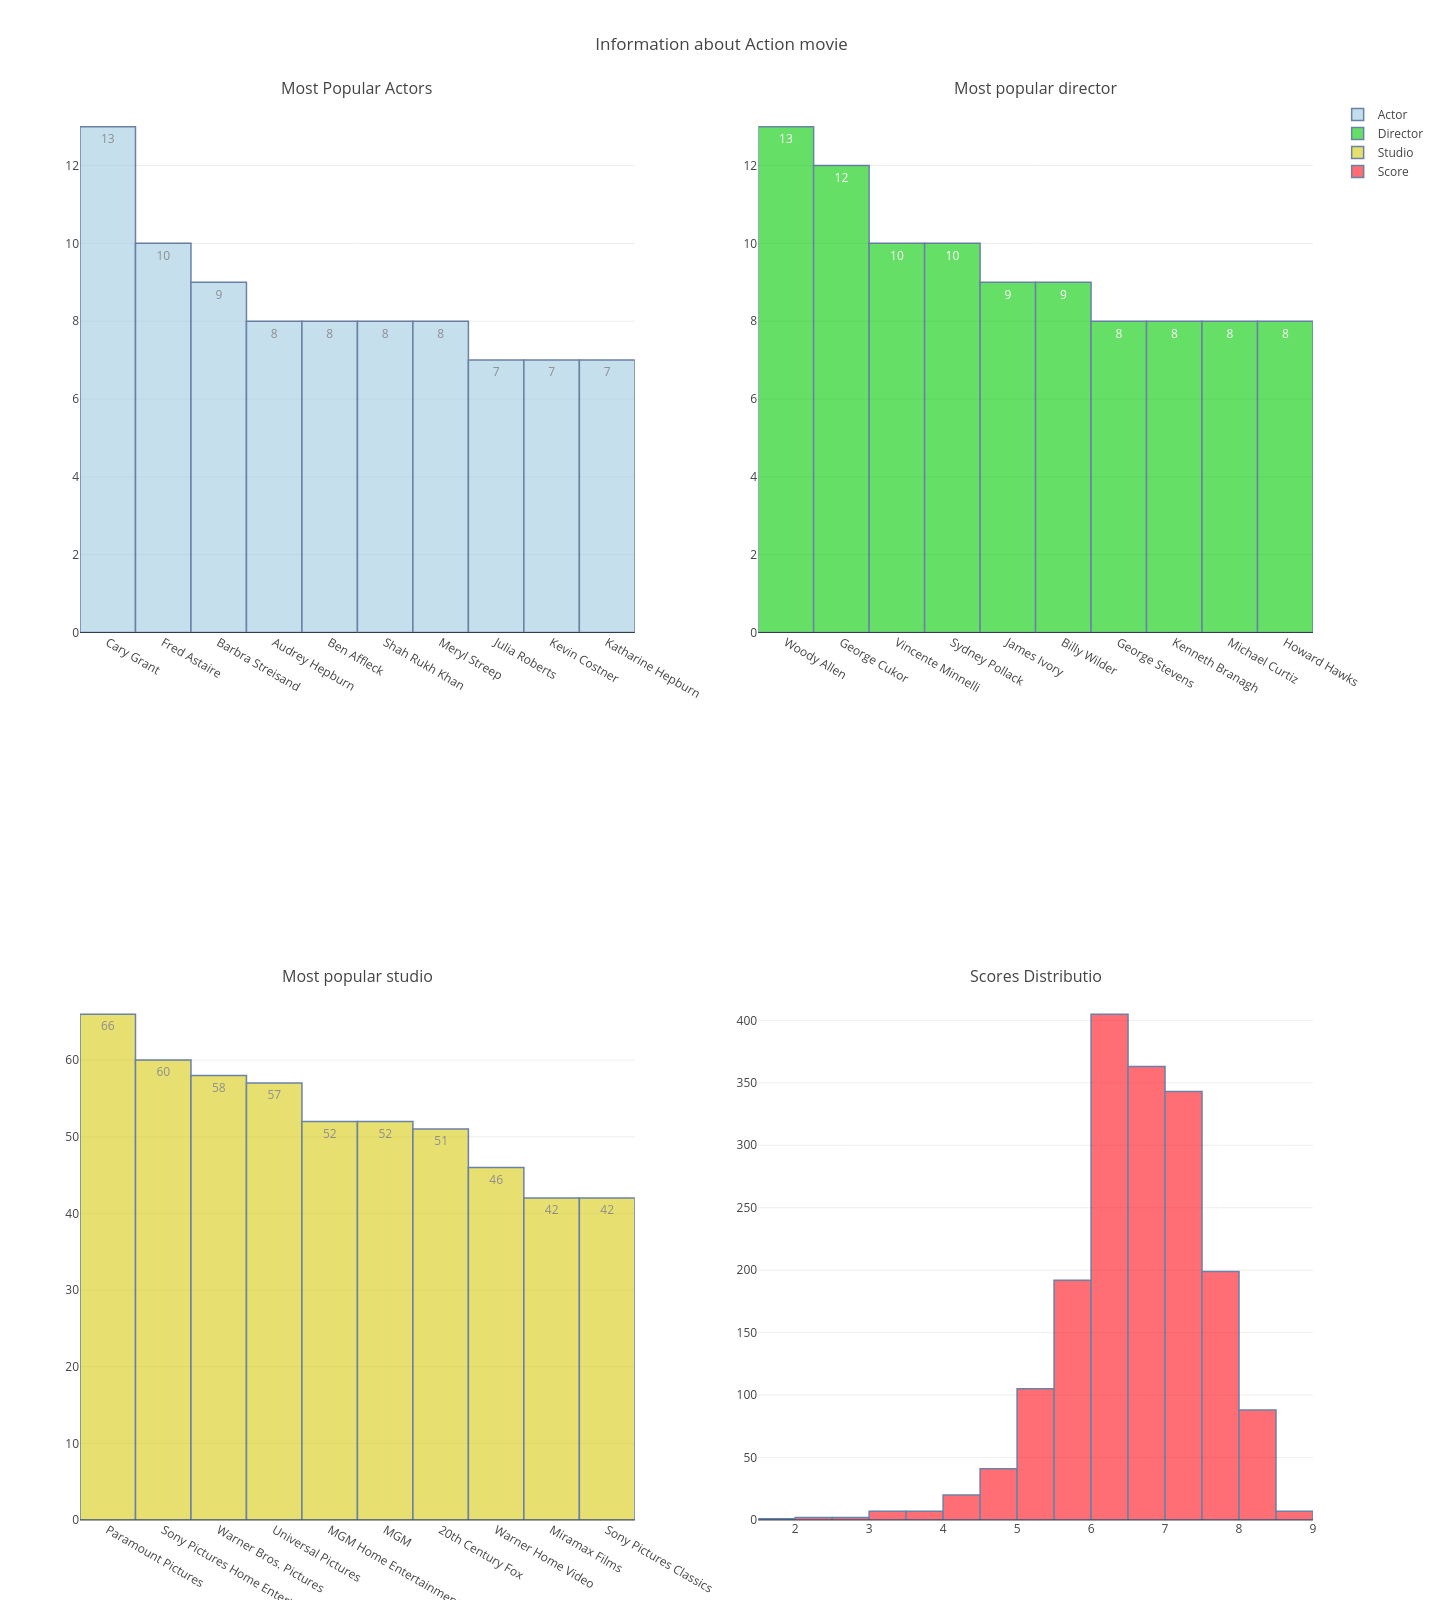

<Figure size 2160x1440 with 0 Axes>

In [112]:
df_romance = movie[movie['Genre'].str.contains('Romance') ]
plt.figure(figsize=(30,20))
df_action =df_romance
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )
fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Romantic movie')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



/home/guangya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



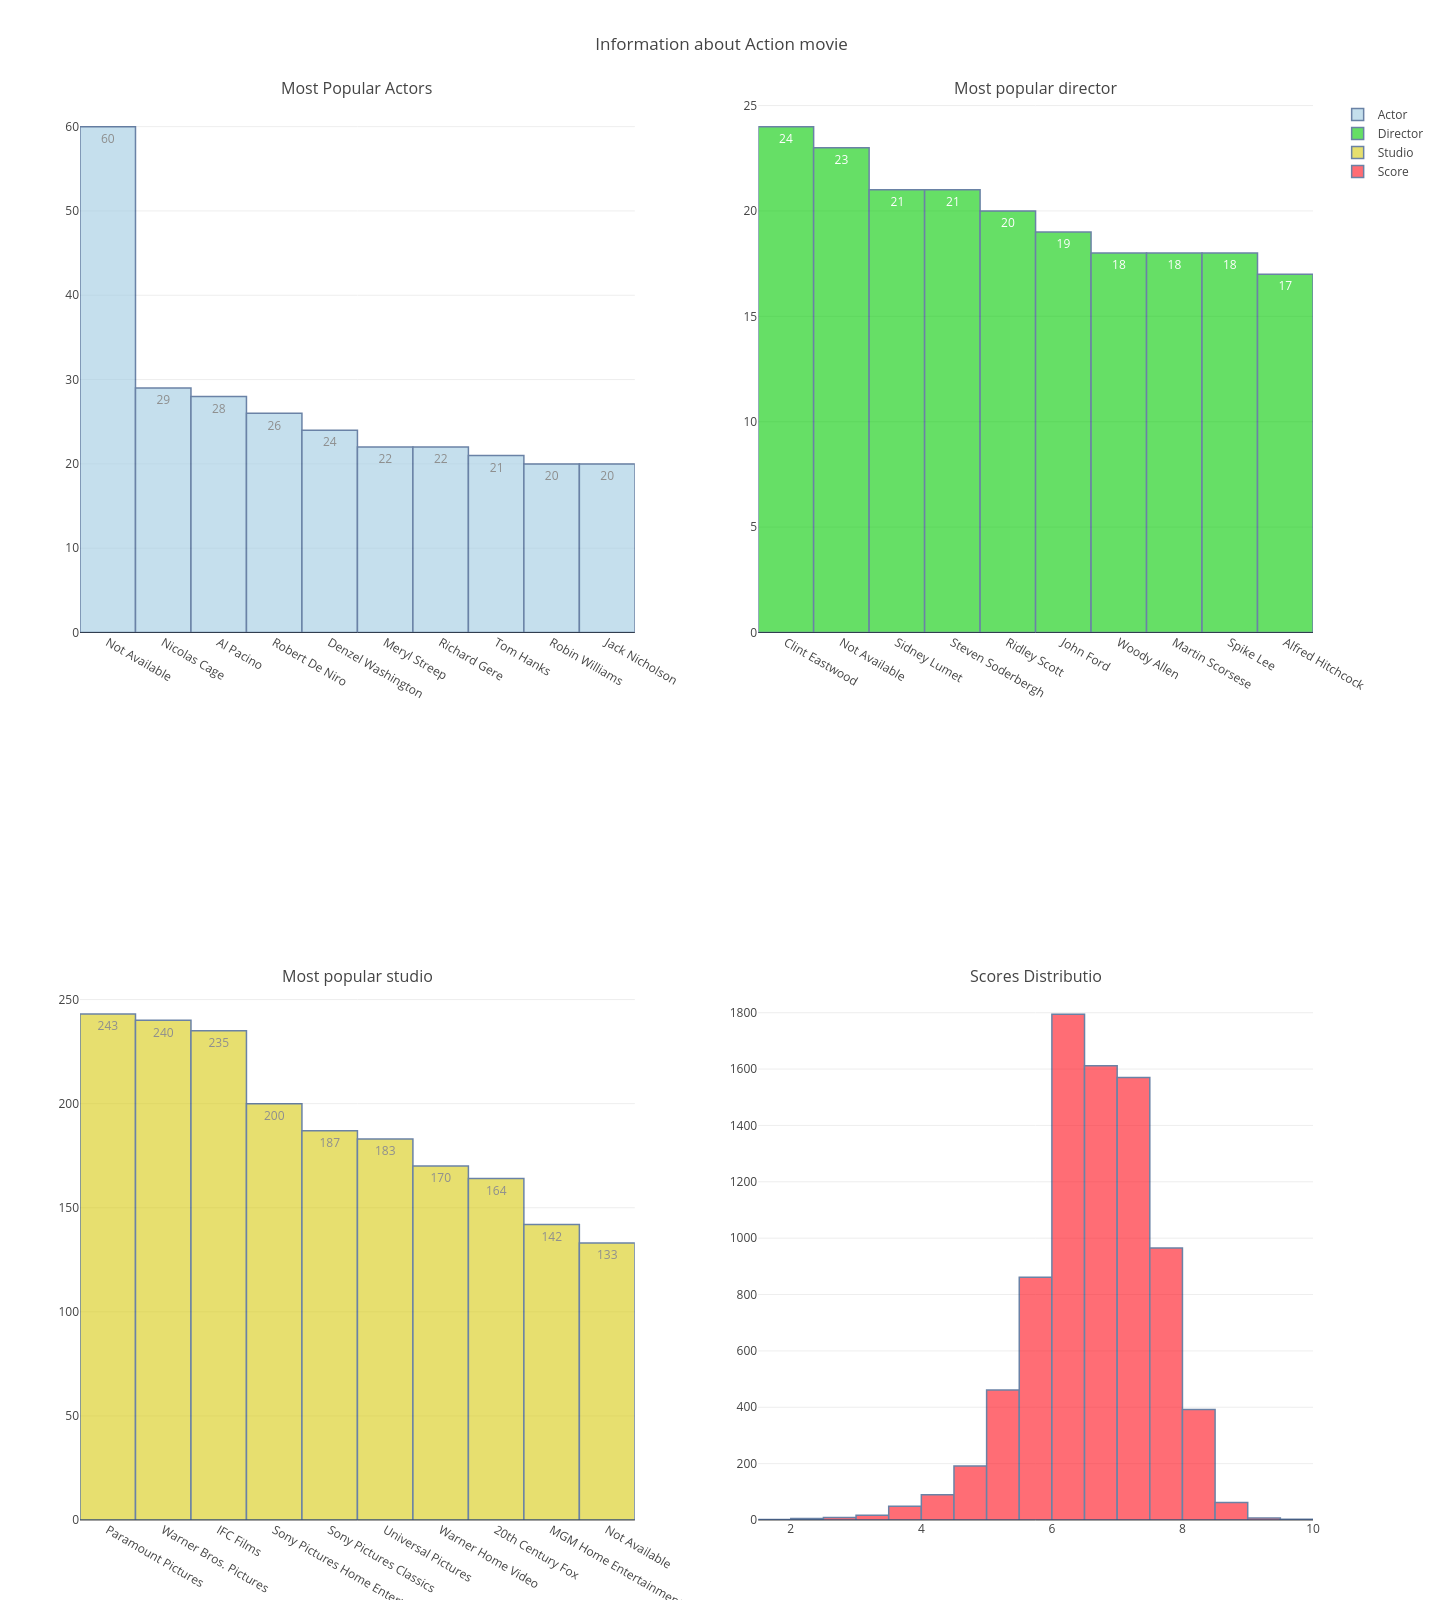

<Figure size 2160x1440 with 0 Axes>

In [113]:
df_drama = movie[movie['Genre'].str.contains('Drama')]
plt.figure(figsize=(30,20))
df_action =df_drama
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[1])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Drama movie')
plot(fig,out_p)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



/home/guangya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



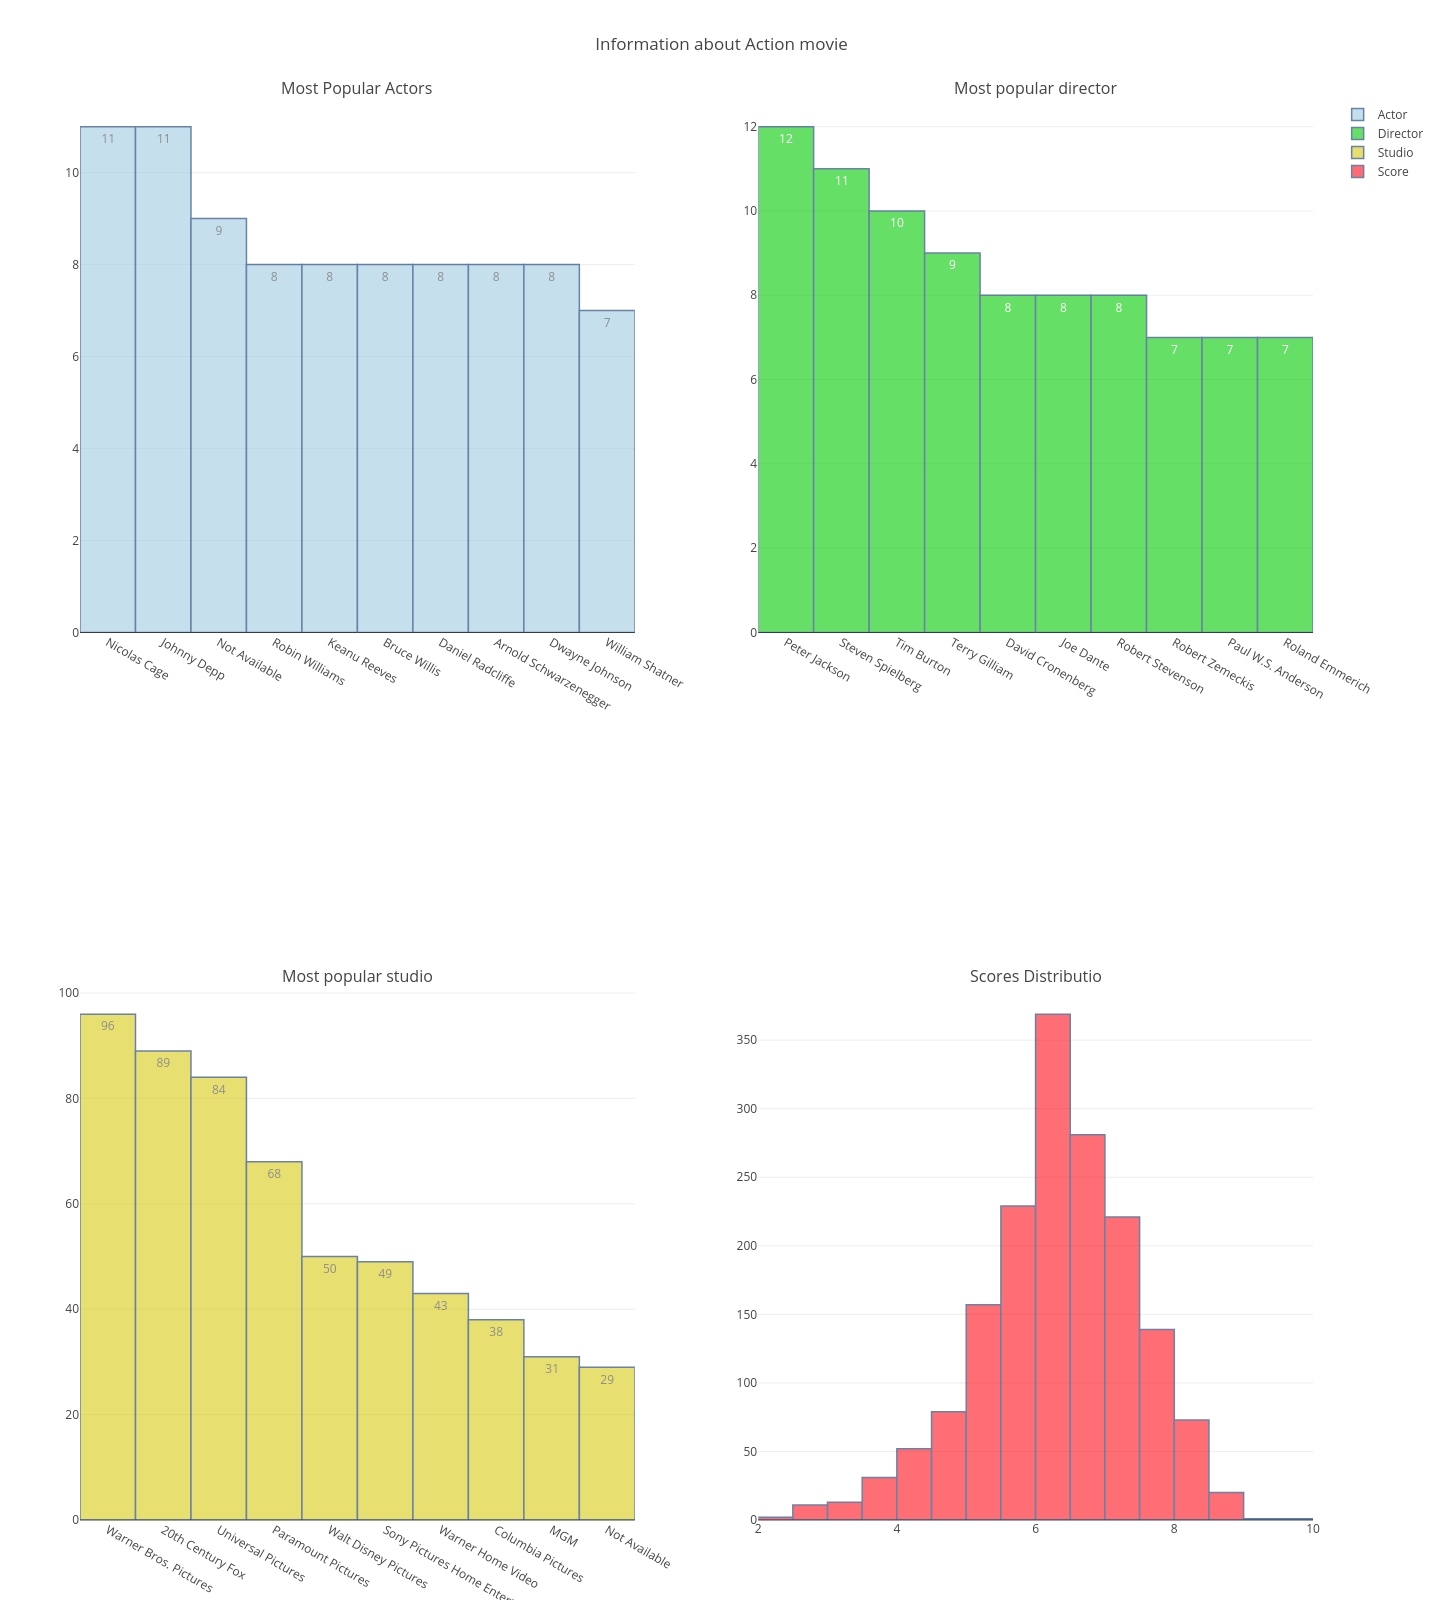

<Figure size 2160x1440 with 0 Axes>

In [114]:
df_scifi = movie[movie['Genre'].str.contains('SciFi')]
plt.figure(figsize=(30,20))
df_action =df_scifi
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Science Fiction movie')
iplot(fig)

/home/guangya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



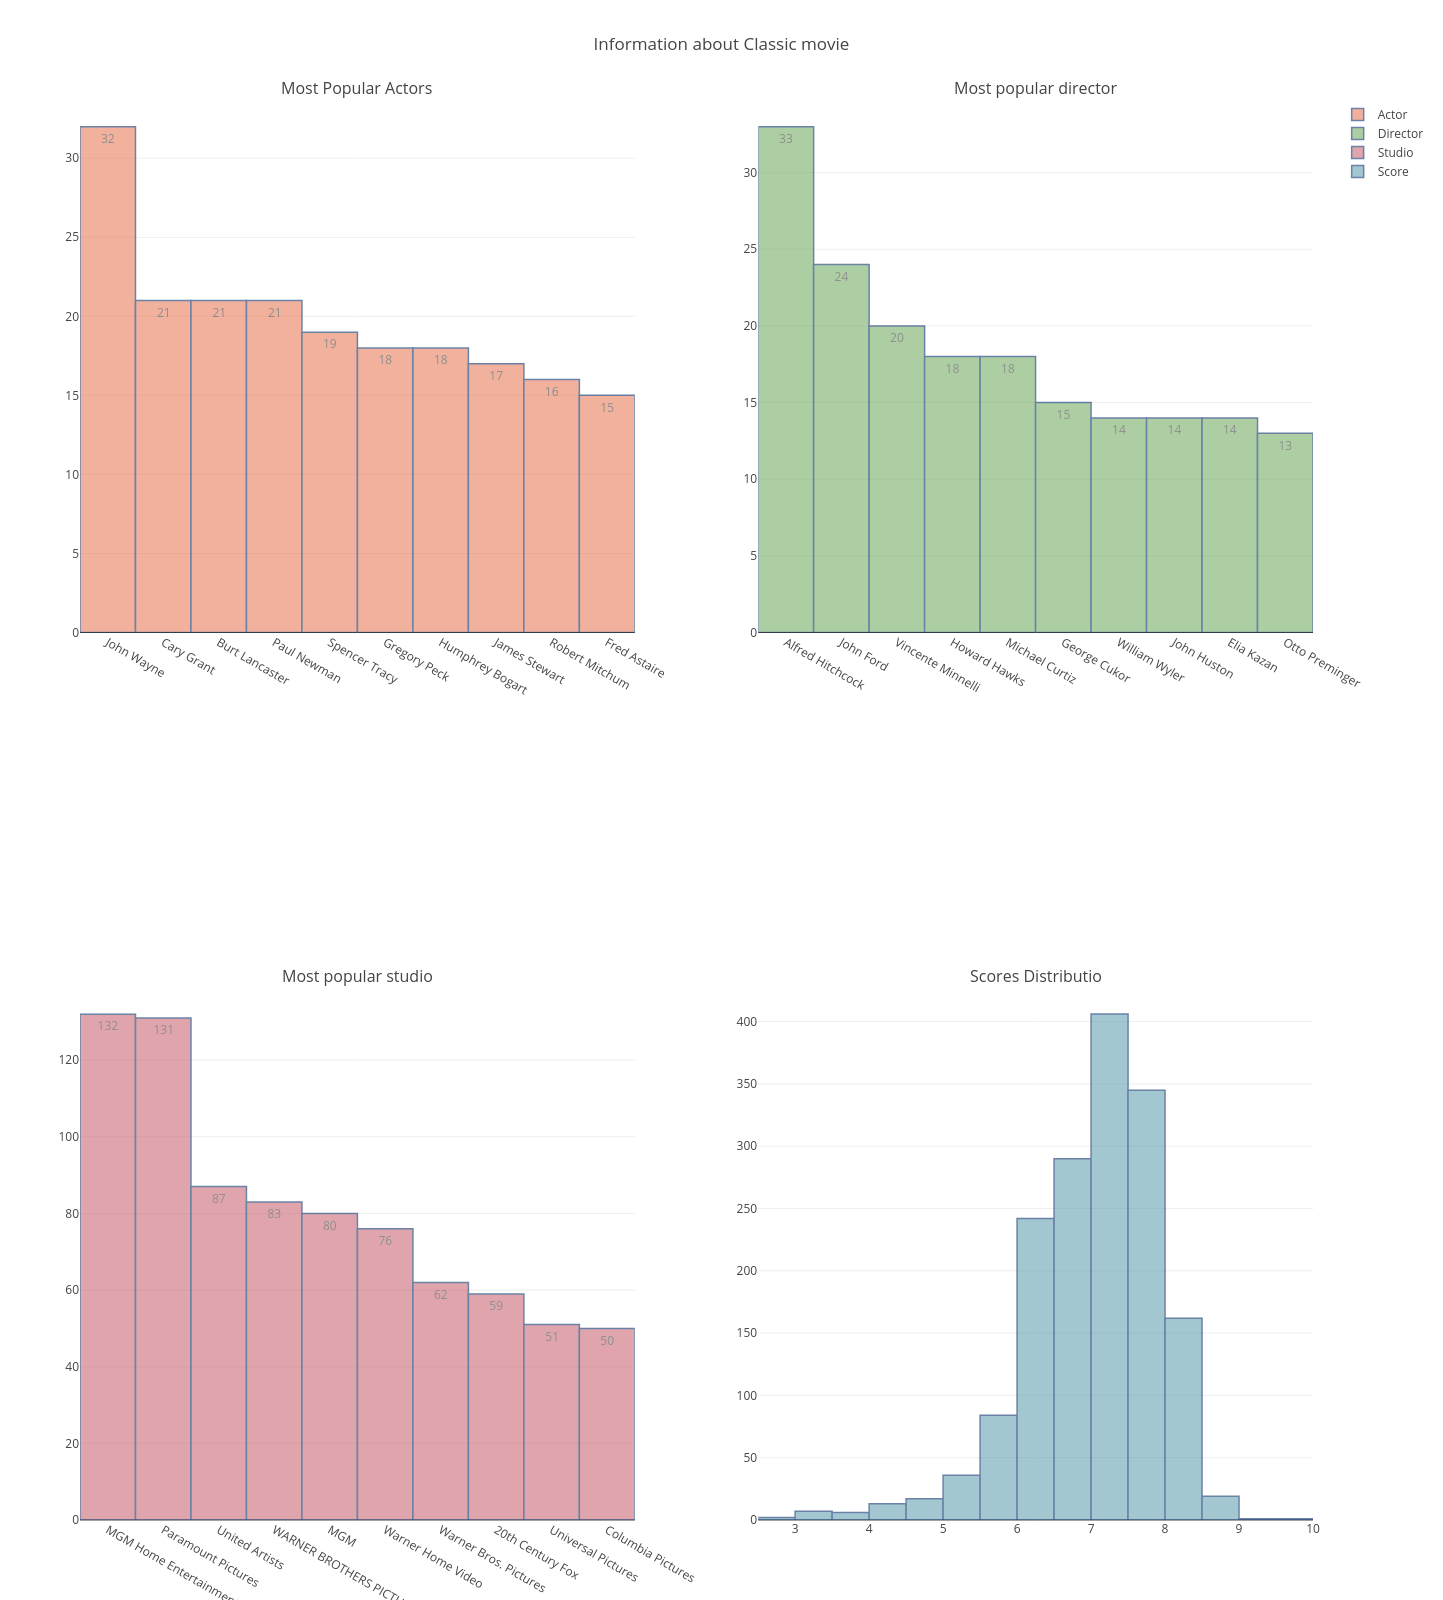

<Figure size 2160x1440 with 0 Axes>

In [119]:
df_class = movie[movie['Genre'].str.contains('Classics')]
plt.figure(figsize=(30,20))
df_action =df_class
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[0])
info.append(df_action['Director 1'].value_counts().index[0])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about Classic movie')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



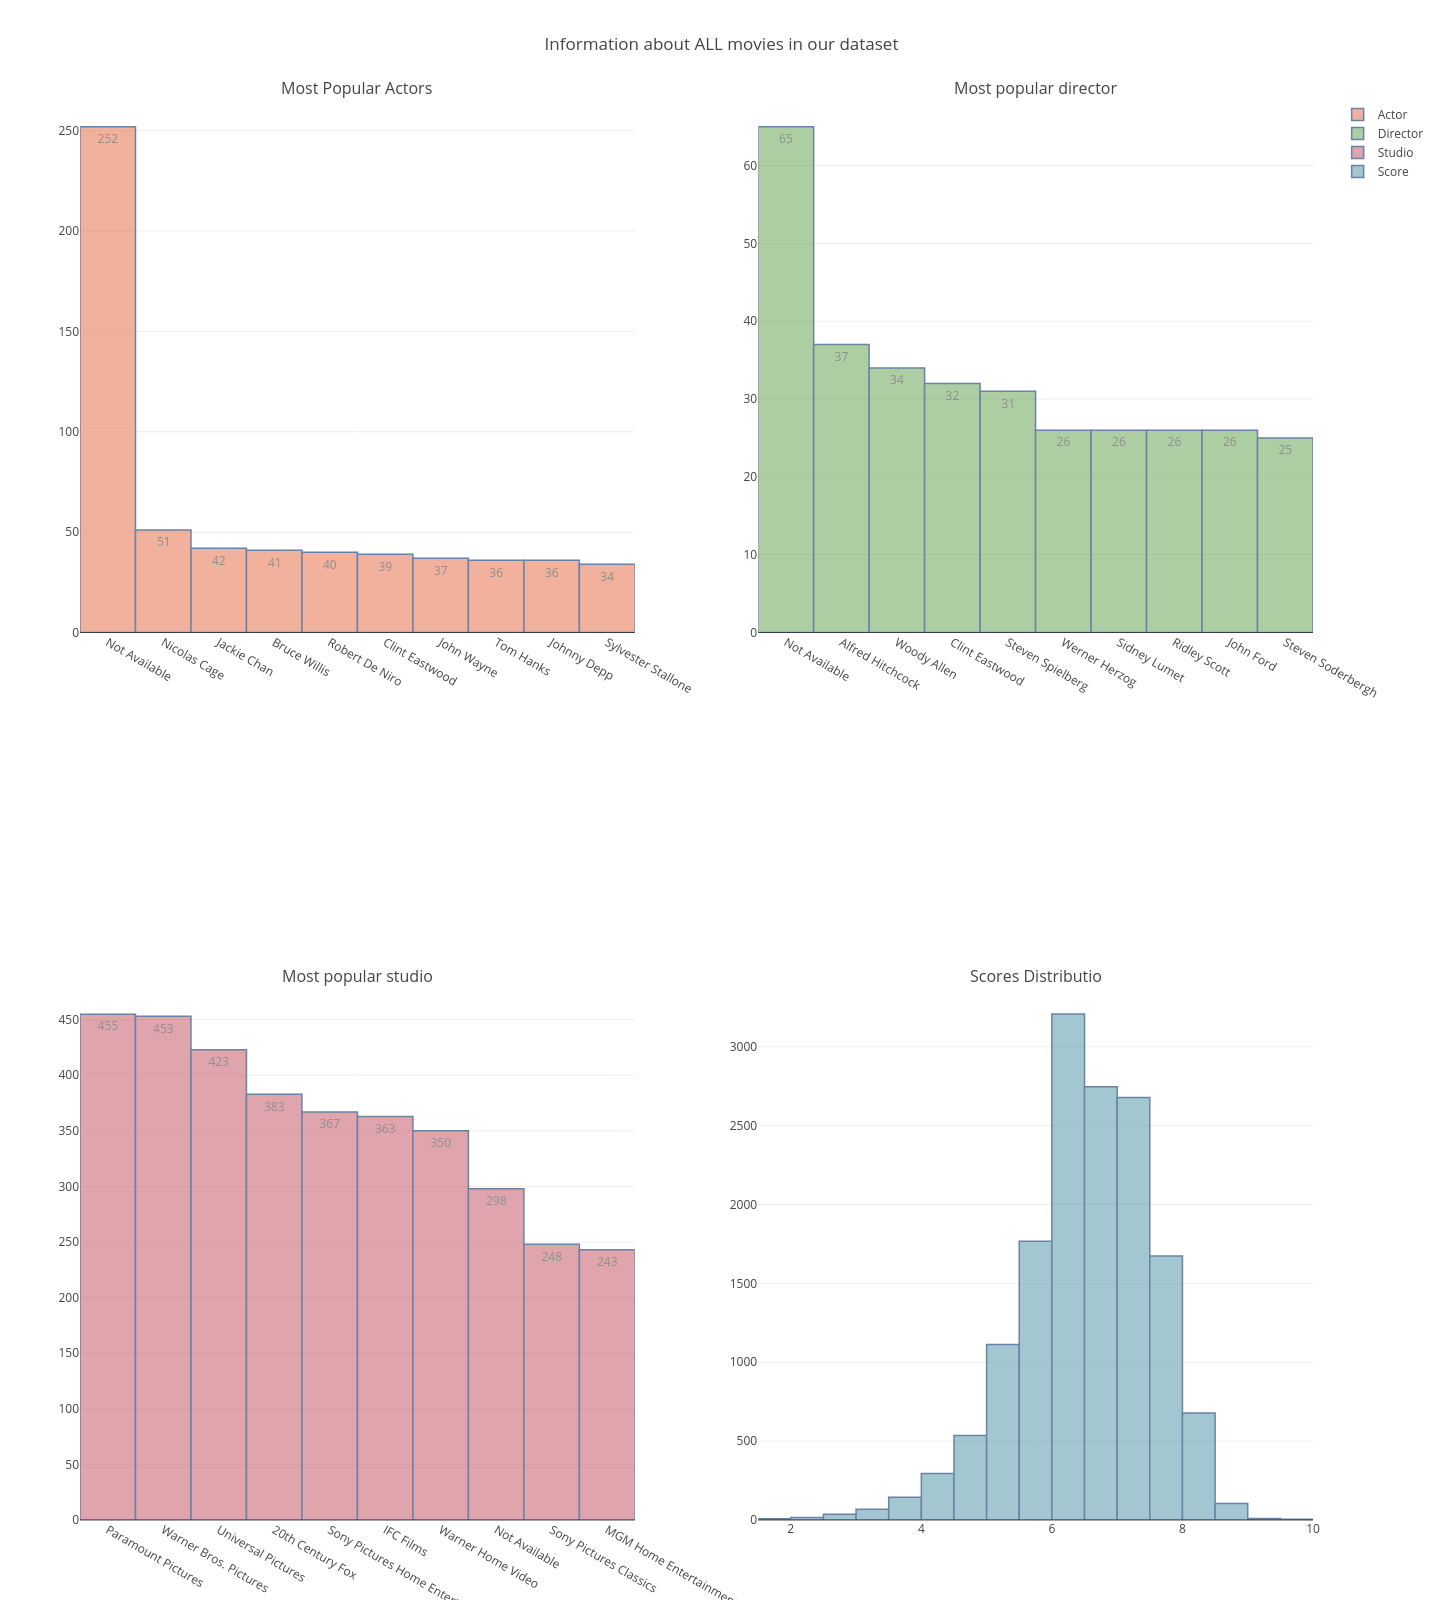

<Figure size 2160x1440 with 0 Axes>

In [118]:
plt.figure(figsize=(30,20))
df_action =movie
df_action.replace('  ','Not Available',inplace = True)
info = []
info.append(len(df_action))
info.append(df_action['Cast 1'].value_counts().index[1])
info.append(df_action['Director 1'].value_counts().index[1])
info.append(df_action['Studio'].value_counts().index[0])
info.append([df_action['scores'].max(),df_action[df_action['scores'] == df_action['scores'].max()]])
info.append([df_action['scores'].min(),df_action[df_action['scores'] == df_action['scores'].min()]])
fig = tools.make_subplots(rows=2, cols=2,subplot_titles = ('Most Popular Actors','Most popular director','Most popular studio','Scores Distributio'))
actor = go.Bar(
            y=df_action['Cast 1'].value_counts()[:10],
            x=df_action['Cast 1'].value_counts()[:10].index[:10],
            text=df_action['Cast 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(234,125,92)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            name = 'Actor',
            opacity=0.6
        )
director = go.Bar(
            y=df_action['Director 1'].value_counts()[:10],
            x=df_action['Director 1'].value_counts()[:10].index[:10],
            text=df_action['Director 1'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(119,174,103)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Director',
            opacity=0.6
        )
studio = go.Bar(
            y=df_action['Studio'].value_counts()[:10],
            x=df_action['Studio'].value_counts()[:10].index[:10],
            text=df_action['Studio'].value_counts()[:10],
            textposition = 'auto',
            marker=dict(
                color='rgb(204,106,118)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Studio',
            opacity=0.6
        )
score = go.Histogram(
            x=df_action['scores'],
            xbins=dict(
            start=0,
            end=10,
            size=0.5
        ),
            marker=dict(
                color='rgb(103,162,178)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
    name = 'Score',
            opacity=0.6
        )

fig.append_trace(actor, 1, 1)
fig.append_trace(director, 1, 2)
fig.append_trace(studio, 2, 1)
fig.append_trace(score, 2, 2)
fig['layout'].update(height=1600, width=1000, title='Information about ALL movies in our dataset')
iplot(fig)

In [124]:
info[4][1]['Cast 1'].iloc[0]

'Kenneth More  '

In [125]:
info[4][1]

,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6,Description,Director 1,Director 2,Director 3,Studio,Title,Writer 1,Writer 2,Writer 3,Writer 4,Genre,Combined,url,scores
686,Kenneth More,Ronald Allen,Honor Blackman,David McCallum,Robert Ayres,Anthony Bushell,This meticulous re-creation of the sinking of ...,Roy Ward Baker,Not Available,Not Available,Criterion Collection,A Night to Remember,Eric Ambler,Not Available,Not Available,Not Available,Action Classics,Kenneth More Ronald Allen Honor Blackman Da...,https://www.imdb.com/title/tt5091902/?ref_=fn_...,9.9
